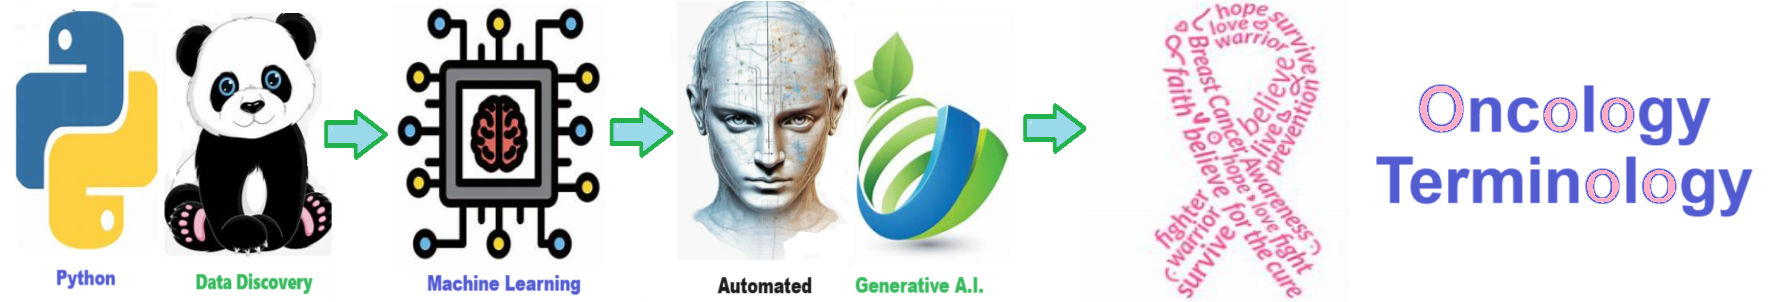

# Oncology Terminology

## A dictionary of  oncology terminology (seeded from ASCO on Cancer.net) 

#### by Joe Eberle started on 05-23-2023 - https://github.com/JoeEberle/ - josepheberle@outlook.com

In [1]:
import os, json
import schedule
from datetime import datetime
import pandas as pd 
import quick_logger as ql
import talking_code as tc 
import file_manager as fm 
import time
print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

Libraries Imported succesfully on 2024-04-18 at 07:53:37.524844


## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [2]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'oncology_terminology'

## Optional Step 0 - Intitiate Logging and debugging 

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process oncology_terminology Step 0 - Initializing and starting Logging Process.


In [4]:
def present_dataframe_as_a_list(df, term_column_number = 0, definition_column_number = 1,  output="print", title=None):
    if len(title) >= 3:
        print(f"## {title}") 
    for index, row in df.iterrows():
        if output=="print" or output=="printsay":
            print(f"{index + 1}. **{row[df.columns[term_column_number]]}** - {row[df.columns[definition_column_number]]}")
        if output=="speech" or output=="printsay":
            tc.say(f"{index + 1}. {row[df.columns[term_column_number]]} - {row[df.columns[definition_column_number]]}")            
    return  

In [5]:
cancer_terms = [
    {"term": "Absolute risk", "description": "The difference between two risks, usually smaller than a relative risk."},
    {"term": "Acute", "description": "Refers to symptoms that start and worsen quickly but do not last over a long time."},
    {"term": "Adjuvant therapy", "description": "Treatment given after the main treatment to reduce the chance of cancer coming back by destroying any remaining cancer cells. It usually refers to chemotherapy, radiation therapy, hormone therapy, and/or immunotherapy given after surgery."},
    {"term": "Americans with Disabilities Act (ADA)", "description": "A federal (national) law that protects people with disabilities from discrimination. It requires employers to make reasonable accommodations in the workplace for qualified individuals with a disability. Learn more from the U.S. Department of Labor."},
    {"term": "Appeal", "description": "Asking your insurance company to reconsider its decision to deny payment for a service or treatment. You have the right to ask your insurance company to conduct a full and fair review of its decision, known as an internal review. If the company still denies payment after considering your appeal, the Affordable Care Act allows you to have an independent review organization decide whether to uphold or overturn the plan’s decision, usually called an external review."},
    {"term": "Associated costs", "description": "Costs that are related to a cancer diagnosis but not specifically due to medical care given to treat the disease; also called non-medical costs. Transportation and childcare during treatment are two common associated costs for people with cancer."},
    {"term": "Average/mean", "description": "The middle value of a set of numbers, calculated by adding all of the values and dividing by the number of values in the set."},
    {"term": "Benign", "description": "Refers to a tumor that is not cancerous. The tumor does not usually invade nearby tissue or spread to other parts of the body."},
    {"term": "Biopsy", "description": "The removal of a small amount of tissue for examination under a microscope. Other tests can suggest that cancer is present, but only a biopsy can make a definite diagnosis. Learn more about biopsy."},
    {"term": "Bone marrow", "description": "The soft, spongy tissue found in the center of large bones where blood cells are formed."},
    {"term": "Bone marrow transplant", "description": "A medical procedure in which diseased bone marrow is replaced by healthy bone marrow from a volunteer donor. Learn more about bone marrow transplantation."},
    {"term": "Cancer", "description": "A group of more than 100 different diseases that can begin almost anywhere in the body, characterized by abnormal cell growth and the ability to invade nearby tissues. Learn more about the basics of cancer."},
    {"term": "Carcinoma", "description": "Cancer that starts in skin or tissues that line the inside or cover the outside of internal organs."},
    {"term": "Case manager", "description": "A health care professional, often a nurse with experience in cancer, who helps coordinate the care of a person with cancer before, during, and after treatment. At a medical center, a case manager may provide a wide range of services for patients that may include managing treatment plans, coordinating health insurance approvals, and locating support services. Insurance companies also employ case managers."},
    {"term": "Cells", "description": "The basic units that make up the human body."},
    {"term": "Chemoprevention", "description": "The use of natural, synthetic (made in a laboratory), or biologic (from a living source) substances to reverse, slow down, or prevent the development of cancer. Learn more about chemoprevention."},
    {"term": "Chemotherapy", "description": "The use of drugs to kill cancer cells. Learn more about chemotherapy."},
    {"term": "Chronic", "description": "Refers to a disease or condition that persists, often slowly, over a long time."},
    {"term": "Claim", "description": "A request made to an insurance company to pay for services covered by a patient’s policy."},
    {"term": "Clinical significance", "description": "An assessment that a research finding will have practical effects on patient care."},
    {"term": "Clinical trial", "description": "A research study that tests new treatments and/or prevention methods to find out whether they are safe, effective, and possibly better than the current standard of care (the best known treatment). Learn more about clinical trials."},
    {"term": "Co-insurance", "description": "The percentage of health care costs an insured patient pays after meeting a health care plan's yearly deductible. For example, an 80/20 co-insurance rate means that the insurance company pays 80% of approved health care costs, and the patient pays the remaining 20% of costs out-of-pocket."},
    {"term": "Co-pay", "description": "A set fee, in dollars, that an insurance provider requires a patient to pay each time care is received. For example, a visit to the oncologist may cost a patient $30 each time; the insurance provider pays the rest of the visit's costs. The amount of the co-pay is set by the insurance provider, not the doctor's office."},
    {"term": "COBRA", "description": "Consolidated Omnibus Budget Reconciliation Act. A federal law that allows employees in danger of losing health insurance under certain circumstances, such as leaving a job or reducing their hours, to pay for and keep their insurance coverage for a limited time."},
    {"term": "Cohort", "description": "A group of individuals who share a common experience, exposure, or trait and who are under observation in a research study."},
    {"term": "Complementary medicine", "description": "A diverse group of treatments, techniques, and products that are used in addition to standard cancer treatments. Learn more about types of complementary therapies."},
    {"term": "Confidence interval", "description": "A measure of the number of times out of 100 (similar to a percentage) that test results will be within a specified range. It is a measurement used to indicate the reliability of an estimate."},
    {"term": "Confounding variable", "description": "A factor in a scientific study that wasn’t addressed that could affect the outcome of the study, such as smoking history in a study of people with cancer."},
    {"term": "Control group", "description": "A group of individuals who do not receive the treatment being studied. Researchers compare this group to the group of individuals who do receive the treatment, which helps them evaluate the safety and effectiveness of the treatment."},
    {"term": "Coverage", "description": "The benefits and services an insurance company will pay for as part of an insurance policy."},
    {"term": "Cure", "description": "To fully restore health. This term is sometimes used when a person's cancer has not returned for at least five years after treatment. However, the concept of “cure” is difficult to apply to cancer because undetected cancer cells can sometimes remain in the body after treatment, causing the cancer to return later, called a recurrence. Recurrence after five years is still possible."},
    {"term": "Deductible", "description": "The amount of approved health care costs an insured patient must pay out-of-pocket each year before the health care plan begins paying any costs."},
    {"term": "Disability insurance", "description": "Insurance that provides an income on either a short-term or a long-term basis to a person with a serious illness or injury that prevents the person from working."},
    {"term": "Disease-free survival (DFS)", "description": "The measure of time after treatment during which no sign of cancer is found. This term can be used for an individual or for a group of people within a study. This term is usually used in the context of scientific research."},
    {"term": "Endpoint", "description": "The results measured at the end of a study to see whether the research question was answered."},
    {"term": "Essential health benefits", "description": "A set of services that an insurance plan is required to provide to patients. There can be no dollar limits each year on the cost that insurance pays for essential health benefits. According to the Affordable Care Act, plans offered in small group and individual markets must provide items and services in at least 10 categories for the plan to be certified and offered in the health care exchanges. Benefit categories include emergency services, preventive wellness and chronic disease management, and prescription drugs. More information is available at HealthCare.gov."},
    {"term": "Event-free survival (EFS)", "description": "The measure of time after treatment that a group of people in a clinical trial has not had cancer come back or get worse. This term is also usually used in the context of scientific research."},
    {"term": "Family and Medical Leave Act (FMLA)", "description": "This federal law offers specific protections for employees during medical leave (when the employee is ill) and family leave (when the employee must care for a spouse, child, or parent who is ill). Learn more from the Department of Labor."},
    {"term": "Fee-for-service", "description": "This is a type of private health insurance in which a person visits a doctor, submits a claim form, and the insurance plan pays the bill using a co-insurance structure. Deductibles are common."},
    {"term": "Follow-up care", "description": "Medical examinations and tests the doctor recommends after the active treatment period. This care is used to monitor a patient’s recovery and check for signs of recurrence."},
    {"term": "HIPAA", "description": "Health Insurance Portability and Accountability Act. This is a set of national rules that help protect the privacy of a patient's personal medical information, provide patients with access to their medical records, and help people with health problems, such as cancer, get health insurance for themselves and their family members. Learn more from the U.S. Department of Health and Human Services."},
    {"term": "HMO", "description": "Health Maintenance Organization; a type of private health insurance. In an HMO, a person chooses a primary care doctor from an approved list called the network. Specialist care must be approved by that primary care doctor, called a referral."},
    {"term": "Hormone therapy", "description": "Treatment that removes, blocks, or adds hormones to destroy or slow the growth of cancer cells. It is also called hormonal therapy or endocrine therapy."},
    {"term": "Imaging test", "description": "A procedure that creates pictures of internal body parts, tissues, or organs to make a diagnosis, plan treatment, find out whether treatment is working, or observe a disease over time."},
    {"term": "Immunotherapy", "description": "A type of cancer treatment designed to boost the body's natural defenses to fight the cancer. It uses materials made either by the body or in a laboratory to improve, target, or restore immune system function. It may also be called biologic therapy. Learn more about immunotherapy."},
    {"term": "In situ", "description": "In place. Refers to cancer that has not spread to nearby tissue, also called non-invasive cancer."},
    {"term": "In-network care", "description": "Health care providers or facilities that are part of an HMO or PPO plan's approved list or network are considered “in network.” In general, in-network care costs patients less than out-of-network care."},
    {"term": "Incidence", "description": "The number of new instances of a disease or condition in a particular population during a specific period. Learn more about statistics used to estimate risk and recommend screening."},
    {"term": "Insurance cap", "description": "The amount of money an insurance plan will pay in total benefits. Once a patient's medical bills reach the total, or cap, the plan will no longer provide coverage. Both lifetime and annual caps were eliminated under the Affordable Care Act. For more information read the section summarizing this law or visit www.healthcare.gov."},
    {"term": "Integrative medicine", "description": "A combination of medical treatments for cancer and complementary therapies to help manage the symptoms and side effects of cancer. Learn more about integrative medicine."},
    {"term": "Invasive cancer", "description": "Cancer that has spread outside the layer of tissue in which it started and has the potential to grow into other tissues or parts of the body, also called infiltrating cancer."},
    {"term": "Laboratory test", "description": "A procedure that evaluates a sample of blood, urine, or other substance from the body to make a diagnosis, plan treatment, check whether treatment is working, or observe a disease over time."},
    {"term": "Late effects", "description": "Side effects of cancer treatment that occur months or years after a diagnosis of cancer because of the related treatments, such as chemotherapy, radiation therapy, or surgery. Learn more about the long-term side effects of cancer treatment."},
    {"term": "Leukemia", "description": "A cancer of the blood. Leukemia begins when normal white blood cells change and grow uncontrollably. "},
    {"term": "Lifetime risk", "description": "The probability of developing a disease or dying from that disease across a person’s lifetime."},
    {"term": "Localized cancer", "description": "Cancer that is confined to the area where it started and has not spread to other parts of the body."},
    {"term": "Long-term care insurance", "description": "Insurance that helps people with long-lasting illnesses or disabilities pay for non-medical daily services and care that ordinary health plans don't cover, such as help with eating, bathing, and dressing. Depending on the plan, care can be given in the home or outside the home."},
    {"term": "Lymphatic system", "description": "A network of small vessels, ducts, and organs that carry fluid to and from the bloodstream and body tissues. Through the lymphatic system, cancer can spread to other parts of the body."},
    {"term": "Lymphoma", "description": "A cancer of the lymphatic system. Lymphoma begins when cells in the lymph system change and grow uncontrollably. Sometimes a tumor is formed."},
    {"term": "Mass", "description": "A lump in the body."},
    {"term": "Median", "description": "The middle value in a range of measurements ordered by value."},
    {"term": "Medicaid", "description": "This is a type of government health insurance for people with low incomes who meet certain conditions. Medicaid is jointly funded by the federal and state governments, but each state operates its program individually (including deciding who can receive Medicaid benefits for that state). Learn more at www.cms.gov."},
    {"term": "Medicare", "description": "This is a type of health insurance provided by the federal government for people 65 or older, as well as for some people with disabilities. Medicare is divided into four parts: Parts A, B, C, and D. Part A covers in-patient hospital care. Part B provides financial coverage using premiums, deductibles, and a co-insurance structure for other medical expenses, such as doctor visits. Medicare Advantage plans, or Part C, are insurance plans managed by private, approved companies. Part D provides prescription drug coverage. Learn more at www.medicare.gov."},
    {"term": "Metastasis", "description": "The spread of cancer from the place where the cancer began to another part of the body. Cancer cells can break away from the primary tumor and travel through the blood or the lymphatic system to the lymph nodes, brain, lungs, bones, liver, or other organs."},
    {"term": "Mortality rate", "description": "The number of deaths in a particular population during a specific time."},
    {"term": "Neoadjuvant therapy", "description": "Treatment given before the main treatment. It may include chemotherapy, radiation therapy, or hormone therapy given before surgery to shrink a tumor so that it is easier to remove."},
    {"term": "Non-essential benefits", "description": "Services provided by an insurance plan that are outside the “essential benefits” category. Patients may be responsible for some or all of these costs."},
    {"term": "Odds ratio", "description": "A comparison of whether the likelihood of an event is similar between two groups; a ratio of 1 means it is equally likely between both groups."},
    {"term": "Oncologist", "description": "A doctor who treats cancer and provides medical care for a person diagnosed with cancer. The five main types of oncologists are medical, surgical, radiation, gynecologic, and pediatric oncologists. Learn more about the types of oncologists."},
    {"term": "Oncology", "description": "The study of cancer."},
    {"term": "Oncology Nurse", "description": "A nurse who specializes in caring for people with cancer."},
    {"term": "Open enrollment", "description": "Specific dates where eligible individuals are able to select or change to a new health care plan. Once this time ends, you may need to wait until the next open enrollment period, usually a year later, to join a health care plan, unless you qualify for a special enrollment period. Find additional information at HealthCare.gov. Medicare participants can go to www.medicare.gov to learn about Medicare open enrollment. If you have private insurance, talk with a health insurance plan representative to learn more."},
    {"term": "Out-of-network care", "description": "Health care providers or facilities that are not part of an HMO or PPO plan's approved list or network are considered “out of network.” Out-of-network care often costs patients more than in-network care and may involve a deductible and require pre-approval for certain services."},
    {"term": "Out-of-pocket costs", "description": "Any expense not covered by insurance that a patient must pay."},
    {"term": "Outcome", "description": "A measurable result or effect."},
    {"term": "Palliative care", "description": "Palliative care is any form of medical care or treatment that concentrates on reducing the severity of disease symptoms, rather than striving to halt, delay, or reverse progression of the disease itself or provide a cure. The goal is to prevent and relieve suffering and to improve quality of life for people facing serious, complex illness."},
    {"term": "Pathologist", "description": "A doctor who specializes in interpreting laboratory tests and evaluating cells, tissues, and organs to diagnose disease."},
    {"term": "Patient-centered care", "description": "A health care approach that involves the patient in all aspects of care."},
    {"term": "Peer-reviewed journal", "description": "A publication in which articles submitted for publication have been evaluated by an independent panel of experts (peers) in the field to determine whether the content is of high quality and worthy of publication. The evaluation process is called peer review. The articles must meet certain criteria, such as being original research and contributing new knowledge to the field."},
    {"term": "Percutaneous", "description": "Performed through the skin, such as a percutaneous biopsy, which is the removal of tissue through the skin."},
    {"term": "Personal health record (PHR)", "description": "A confidential and easy-to-use electronic tool for managing and maintaining your health information in a private, secure, and confidential environment. Some examples include Microsoft HealthVault and Google Health."},
    {"term": "Personalized medicine", "description": "A form of medicine that uses information about a person's genes, proteins, and environment to prevent, diagnose, and treat disease. Learn more about personalized medicine."},
    {"term": "Phase", "description": "A step in the clinical research process. Clinical trials are conducted in a series of steps, called phases, that build on one another. A phase 1 trial tests an experimental drug or treatment in a small group of people for the first time. In a phase 2 trial, the experimental study drug or treatment is given to a larger group of people to see if it is effective and to further evaluate its safety. A phase 3 trial compares the new treatment to the standard treatment to see which is more effective. Phase 4 trials test the safety and efficacy of treatments that have been approved by the FDA."},
    {"term": "Placebo", "description": "An inactive substance or treatment that looks the same as, and is given the same way as, an active drug or treatment being tested in a clinical trial. The effects of the active drug or treatment are compared with the effects of the placebo."},
    {"term": "Policy", "description": "The contract between the insurance company and the policyholder that describes the benefits and limitations of the insurance coverage."},
    {"term": "Pre-existing condition", "description": "A health problem that existed before the date your insurance coverage starts."},
    {"term": "Preclinical study", "description": "A stage of research that usually involves the use of laboratory tests and animal studies to explore whether a drug or treatment has potential therapeutic value. If successful, preclinical studies may lead to the development of a new therapy that can be tested in humans."},
    {"term": "Prevalence", "description": "The number of people with a particular disease or condition in a specific population at a given time."},
    {"term": "Primary care doctor", "description": "A doctor who provides general medical care and coordinates other health care. Also called a general practitioner, family practitioner, or internist. Learn more about finding a doctor."},
    {"term": "Prognosis", "description": "A prediction of the course of a disease and the chances of recovery."},
    {"term": "Protocol", "description": "A detailed plan of a scientific or medical experiment, treatment, or procedure."},
    {"term": "Provider", "description": "A person or institution that provides health care services."},
    {"term": "Quality-of-life study", "description": "A study that measures a patient’s well-being and ability to perform normal activities of daily living during and after treatment for cancer."},
    {"term": "Radiation oncologist", "description": "A doctor who specializes in using radiation therapy to treat cancer."},
    {"term": "Radiation therapy", "description": "The use of high-energy rays to damage cancer cells, stopping them from growing and dividing while minimizing damage to healthy cells. Learn more about radiation therapy."},
    {"term": "Randomized clinical trial", "description": "A study in which participants are assigned by chance to either the experimental group or the control group. This type of study is considered the gold standard for determining whether a treatment works."},
    {"term": "Recurrence", "description": "The return of cancer after treatment."},
    {"term": "Relative risk", "description": "The ratio of the probability of an event occurring in an exposed group to the probability of the event occurring in an unexposed group. It is usually expressed as a proportion."},
    {"term": "Remission", "description": "A decrease in or disappearance of signs and symptoms of cancer. In partial remission, some, but not all, signs and symptoms of cancer have disappeared. In complete remission, all signs and symptoms of cancer have disappeared, although cancer still may be in the body."},
    {"term": "Research study", "description": "A scientific investigation to answer specific questions about treatments or preventive measures. Learn more about types of research studies."},
    {"term": "Respite care", "description": "A form of short-term relief for primary caregivers. Respite care can occur in the home or at an outside facility and is designed to provide temporary relief to caregivers."},
    {"term": "Risk factor", "description": "Anything that increases a person’s chance of developing a disease. For example, smoking is a risk factor for lung cancer."},
    {"term": "Screening", "description": "Checking for disease when there are no symptoms. Because early detection can make a difference in outcomes, some cancers can be detected early through screening tests. Learn more about cancer screening."},
    {"term": "Secondary cancer", "description": "Cancer that has spread from the place where it started to another part of the body. Secondary cancer is the same type of cancer as the primary cancer. It is also called metastatic cancer."},
    {"term": "Second opinion", "description": "A doctor's review of your diagnosis and treatment plan by another doctor."},
    {"term": "Side effect", "description": "Any undesired actions or effects of a drug or treatment. Side effects can be mild, moderate, or severe and can be temporary or permanent."},
    {"term": "Specialist", "description": "A doctor who has advanced education and clinical training in a specific area of medicine. A specialist focuses on a particular area of medicine, such as oncology, cardiology, or obstetrics."},
    {"term": "Standard of care", "description": "Treatment that is widely accepted and practiced by a consensus of medical professionals."},
    {"term": "Statistically significant", "description": "An assessment that a research finding is likely to be valid, meaning that it is not likely to have occurred by chance. This term is often used in statistical analysis to describe the probability that a result could have occurred randomly. For example, a finding is considered statistically significant if there is a less than 5% probability that it happened by chance alone."},
    {"term": "Stem cell transplant", "description": "A procedure to replace damaged or destroyed stem cells in patients whose normal blood cells have been affected by cancer or other diseases. Stem cells are removed (harvested) from the patient or from a donor and stored frozen until they are needed for transplant."},
    {"term": "Supportive care", "description": "Care given to improve the quality of life of patients who have a serious or life-threatening disease, such as cancer. Supportive care includes physical, emotional, social, and spiritual support."},
    {"term": "Survival rate", "description": "The percentage of people with a particular cancer who are alive at certain points in time after their diagnosis. Learn more about understanding cancer survival rates."},
    {"term": "Symptom management", "description": "Treatment that prevents, controls, or relieves symptoms caused by cancer and its treatment. Symptom management includes palliative care."},
    {"term": "Targeted therapy", "description": "A type of cancer treatment that uses drugs or other substances to identify and attack specific cancer cells without harming normal cells. It is also called molecularly targeted therapy."},
    {"term": "Telemedicine", "description": "The use of telecommunications technology to provide real-time health care to patients at a distance. It allows health care professionals to evaluate, diagnose, and treat patients using telecommunications technology, such as videoconferencing."},
    {"term": "Tertiary care", "description": "Specialized consultative care, usually on referral from primary or secondary medical care personnel, by specialists working in a center that has personnel and facilities for special investigation and treatment."},
    {"term": "Tumor", "description": "An abnormal mass of tissue that results when cells divide more than they should or do not die when they should. Tumors may be benign (not cancer) or malignant (cancer)."},
    {"term": "Tumor marker", "description": "A substance found in the blood, urine, or body tissues that can be elevated in cancer or other conditions. Tumor markers may be used to help diagnose cancer, plan treatment, or monitor the progress of cancer therapy. Learn more about tumor markers."},
    {"term": "Underwriting", "description": "The process by which an insurance company evaluates the risk of insuring a particular person, company, or asset and sets the appropriate premium."},
    {"term": "Utilization review", "description": "The process used by health insurance companies to decide if they will cover a prescribed treatment or service. It is usually based on medical necessity and appropriateness of care."},
    {"term": "Watchful waiting", "description": "A way of closely monitoring a patient’s condition without giving any treatment until signs or symptoms appear or change. It is also called observation or surveillance."},
    {"term": "Wellness", "description": "A state of overall good health, which includes physical, mental, emotional, and spiritual well-being. It can also refer to the actions, policies, and practices that help people achieve and maintain good health."},
    {"term": "White blood cells", "description": "Cells made in the bone marrow and found in the blood that help the body fight infections and other diseases. Also called leukocytes."}
]

In [6]:
# Save the JSON variable to a file
with open("cancer_terms.json", "w") as file:
    json.dump(cancer_terms, file)

# # Load the JSON file into a pandas DataFrame
with open("cancer_terms.json", "r") as file:
    df = pd.DataFrame(json.load(file))
df.to_excel("cancer_terms.xlsx") 
present_dataframe_as_a_list(df, 0, 1, "print","Cancer Terms:")

## Cancer Terms:
1. **Absolute risk** - The difference between two risks, usually smaller than a relative risk.
2. **Acute** - Refers to symptoms that start and worsen quickly but do not last over a long time.
3. **Adjuvant therapy** - Treatment given after the main treatment to reduce the chance of cancer coming back by destroying any remaining cancer cells. It usually refers to chemotherapy, radiation therapy, hormone therapy, and/or immunotherapy given after surgery.
4. **Americans with Disabilities Act (ADA)** - A federal (national) law that protects people with disabilities from discrimination. It requires employers to make reasonable accommodations in the workplace for qualified individuals with a disability. Learn more from the U.S. Department of Labor.
5. **Appeal** - Asking your insurance company to reconsider its decision to deny payment for a service or treatment. You have the right to ask your insurance company to conduct a full and fair review of its decision, known as an 

## Step 0 - Process End - display log

In [7]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2024-04-18 07:53:37,563 - INFO - START oncology_terminology =============================================
2024-04-18 07:53:37,563 - INFO - START oncology_terminology Start Time = 2024-04-18 07:53:37
2024-04-18 07:53:37,563 - INFO - oncology_terminology Step 0 - Initialize the configuration file parser
2024-04-18 07:53:37,563 - INFO - Process oncology_terminology Step 0 - Initializing and starting Logging Process.
2024-04-18 07:53:37,703 - INFO - PERFORMANCE oncology_terminology The total process duration was:0.14
2024-04-18 07:53:37,703 - INFO - PERFORMANCE oncology_terminology Stop Time = 2024-04-18 07:53:37
2024-04-18 07:53:37,703 - INFO - PERFORMANCE oncology_terminology Short process duration less than 3 Seconds:0.14
2024-04-18 07:53:37,703 - INFO - PERFORMANCE oncology_terminology Performance optimization is not reccomended
2024-04-18 07:53:37,703 - INFO - END oncology_terminology =============================================



#### https://github.com/JoeEberle/ -- josepheberle@outlook.com